In [1]:
#importar los paquetes que se van a usar
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like# hack para que jale pd data reader
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_historical_closes(tickers, start_date=None, end_date=None, freq=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [3]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

## calculamos la opción de compra de Amazon mayor a 200 dias

In [4]:
stock = web.YahooOptions('AMZN')
stock_opt = stock.get_all_data().reset_index()

#pd.set_option('display.expand_frame_repr', False,'display.max_columns',False,'display.max_rows',False)
stock_opt.set_index('Expiry')
# closes = web.YahooDailyReader(ticker, start_date, end_date).read().sort_index('major_axis')

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2019-01-18,365.0,call,AMZN190118C00365000,...,2018-11-09 21:00:01,2018-11-09 16:16:41,"{'contractSymbol': 'AMZN190118C00365000', 'str..."
2019-01-18,365.0,put,AMZN190118P00365000,...,2018-11-09 21:00:01,2018-11-09 18:27:46,"{'contractSymbol': 'AMZN190118P00365000', 'str..."
2019-01-18,370.0,call,AMZN190118C00370000,...,2018-11-09 21:00:01,2018-11-01 17:16:20,"{'contractSymbol': 'AMZN190118C00370000', 'str..."
2019-01-18,370.0,put,AMZN190118P00370000,...,2018-11-09 21:00:01,2018-11-09 17:30:05,"{'contractSymbol': 'AMZN190118P00370000', 'str..."
2019-01-18,375.0,call,AMZN190118C00375000,...,2018-11-09 21:00:01,2018-11-09 16:09:36,"{'contractSymbol': 'AMZN190118C00375000', 'str..."
...,...,...,...,...,...,...,...
2019-06-21,3000.0,put,AMZN190621P03000000,...,2018-11-09 21:00:01,2018-10-02 13:44:59,"{'contractSymbol': 'AMZN190621P03000000', 'str..."
2020-01-17,3000.0,call,AMZN200117C03000000,...,2018-11-09 21:00:01,2018-11-09 20:56:51,"{'contractSymbol': 'AMZN200117C03000000', 'str..."
2020-01-17,3000.0,put,AMZN200117P03000000,...,2018-11-09 21:00:01,2018-11-08 15:28:51,"{'contractSymbol': 'AMZN200117P03000000', 'str..."


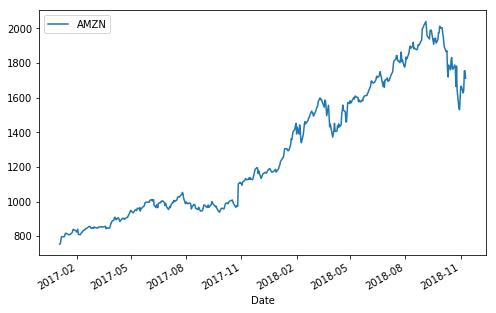

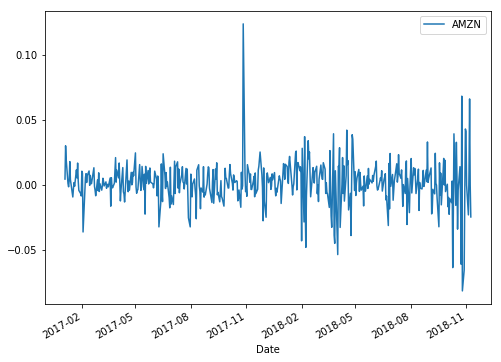

In [5]:
#%%BAJAR PRECIOS DEL STOCK
ticker = ['AMZN']
start_date = '2017-01-01'

closes_st = get_historical_closes(ticker, start_date,freq='d')
closes_st.plot(figsize=(8,5));
plt.legend(ticker);
#RENDIMIENTOS
ret_stock = calc_daily_ret(closes_st)
ret_stock.plot(figsize=(8,6));

In [7]:
#opcion activo 1 amazon a mas de 200 dias
stock_opt.loc[(stock_opt.Type=='call')& (stock_opt.Strike==3000)  & (stock_opt.Expiry=='2020-01-17')]
opcion_valuar = stock_opt.loc[3344]
opcion_valuar['JSON']

{'contractSymbol': 'AMZN200117C03000000',
 'strike': 3000.0,
 'currency': 'USD',
 'lastPrice': 22.6,
 'change': -1.3999996,
 'percentChange': -5.833332,
 'volume': 26,
 'openInterest': 824,
 'bid': 21.75,
 'ask': 24.2,
 'contractSize': 'REGULAR',
 'expiration': 1579219200,
 'lastTradeDate': 1541797011,
 'impliedVolatility': 0.3425206129455566,
 'inTheMoney': False}

Las std usando rendimientos logarítmicos y simples son iguales


(0.016875133251193705, 0.016794935544138127)

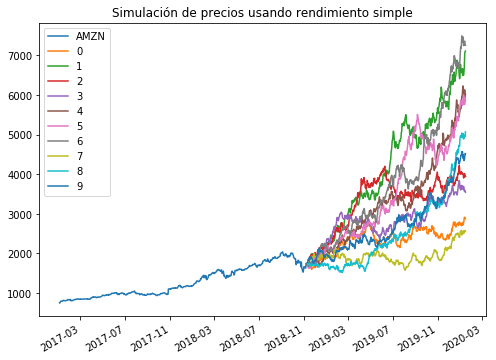

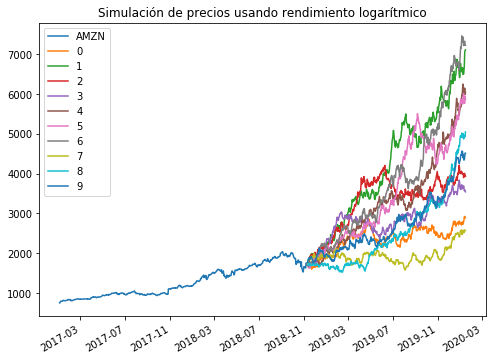

In [8]:
#%% RENDIMIENTOS 

ticker = ['AMZN']
start_date = '2017-01-01'
closes_st = get_historical_closes(ticker, start_date,freq='d')
closes_st
# Obtenemos el rendimiento simple
Ri = closes_st.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri
ndays = 432#dias a transcurrir de hoy al 2020-01-17
nscen = 10
dates = pd.date_range('2018-11-11', periods = ndays)
dates
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()
# Simulación del precio
S_0 = closes_st.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_st,S_T]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');
#rendimiento logaritmico
ri = calc_daily_ret(closes_st)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)
# sim_ret_ri
# Simulación del precio
S_0 = closes_st.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_st,S_T2]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento logarítmico');
S_T-S_T2
print('Las std usando rendimientos logarítmicos y simples son iguales')
sigma_R,sigma_r

(27.136890462830017, 38.13756936772537)
(27.136890462830017, 38.13756936772537)
precio de la prima modelo normal para rendimientos :  Prima    32.637
Name: 2020-01-16 00:00:00, dtype: float64


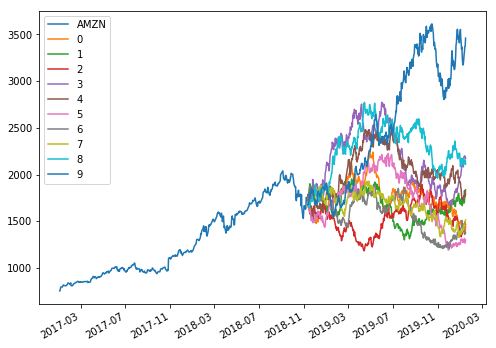

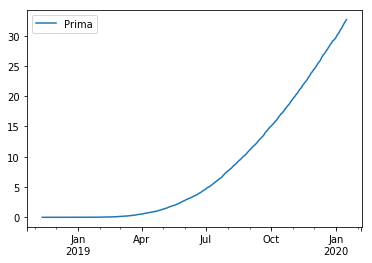

In [9]:
#%%valuacion usando modelo normal para rendimientos
mu = ret_stock.mean()[0]
sigma = ret_stock.std()[0]
mu, sigma
r = 0.0260/360 # Tasa diaria
nscen = 10
dates = pd.date_range('2018-11-11', periods = ndays)
dates
#GENERAR 10 ESCENARIOS
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato
S0 = closes_st.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes
#sim_closes.plot(figsize=(8,6));
pd.concat([closes_st,sim_closes]).plot(figsize=(8,6));

K=3000 # strike price
ndays = 432
nscen = 100000
dates = pd.date_range('2018-11-11', periods = ndays)
S0 = closes_st.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
putmnr = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(sim_closes-strike,np.zeros([ndays,nscen])).T.mean()}, index=dates)
putmnr.plot();
#aqui es donde se le mete la ecacion BS put= -st+k
putmnr.iloc[-1]
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = putmnr.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)
print('precio de la prima modelo normal para rendimientos : ',putmnr.iloc[-1])

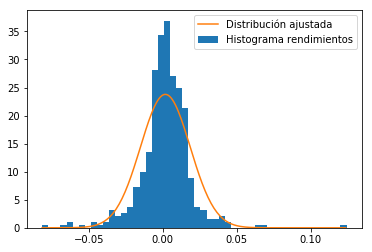

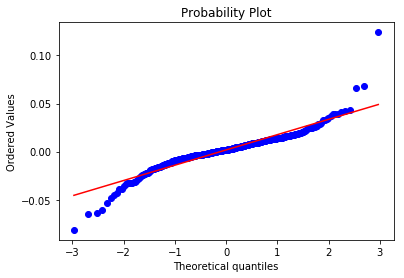

In [10]:
#%% ANALISIS DE RENDIMIENTOS
ren = calc_daily_ret(closes_st) # rendimientos 
y,x,des = plt.hist(ren['AMZN'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()
st.probplot(ren['AMZN'], dist='norm', plot=plt);

(27.87557066535136, 55.307808179977144)
(27.87557066535136, 55.307808179977144)
precio de la prima usando histograma de rendimientos:  Prima    41.592
Name: 2020-01-16 00:00:00, dtype: float64


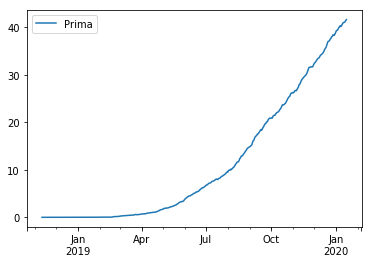

In [11]:
#%%Valuación usando simulación: uso del histograma de rendimientos
prob = y/np.sum(y)
values = x[1:]
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range('2018-11-11',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist
sim_closes_hist = (closes_st.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist
K=3000
ndays = 432
nscen = 10000
freq, values = np.histogram(ret_stock+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-11-11',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_st.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                          *np.fmax(sim_closes_hist-strike,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();
#aqui es donde se le mete la ecacion BS put= -st+k
put_hist.iloc[-1]
#INTERVALO DE CONFIANZA
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)
print('precio de la prima usando histograma de rendimientos: ',put_hist.iloc[-1])

In [12]:
#%%valuacion vs primas valuadas en yahoo finance
print('precio de la prima modelo normal para rendimientos : ',putmnr.iloc[-1])
print('precio de la prima usando histograma de rendimientos: ',put_hist.iloc[-1])
stock_opt.loc[(stock_opt.Type=='call')& (stock_opt.Strike==3000)  & (stock_opt.Expiry=='2020-01-17')]
opcion_valuar = stock_opt.loc[3344]
opcion_valuar['JSON']

precio de la prima modelo normal para rendimientos :  Prima    32.637
Name: 2020-01-16 00:00:00, dtype: float64
precio de la prima usando histograma de rendimientos:  Prima    41.592
Name: 2020-01-16 00:00:00, dtype: float64


{'contractSymbol': 'AMZN200117C03000000',
 'strike': 3000.0,
 'currency': 'USD',
 'lastPrice': 22.6,
 'change': -1.3999996,
 'percentChange': -5.833332,
 'volume': 26,
 'openInterest': 824,
 'bid': 21.75,
 'ask': 24.2,
 'contractSize': 'REGULAR',
 'expiration': 1579219200,
 'lastTradeDate': 1541797011,
 'impliedVolatility': 0.3425206129455566,
 'inTheMoney': False}

Análisis de las opciones valuadas:

El precio de amazon es de 1,712.43, por lo que al valuar opciones que vencen en 432 dias, value una opcion que casi duplique el precio. La valuación tiene una variación del 27%, siendo una cifra significativa y muy diferente a la última opción similar valuada.

## valuación de opcion de compra de BEST BUY

In [13]:
#%% BAJAR PRECIOS DE OPCIONES
stock = web.YahooOptions('BBY')
stock_opt = stock.get_all_data().reset_index()
#pd.set_option('display.expand_frame_repr', False,'display.max_columns',False,'display.max_rows',False)
stock_opt.set_index('Expiry')
# closes = web.YahooDailyReader(ticker, start_date, end_date).read().sort_index('major_axis')

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2019-01-18,20.0,call,BBY190118C00020000,...,2018-11-09 21:00:18,2018-09-22 03:47:15,"{'contractSymbol': 'BBY190118C00020000', 'stri..."
2019-01-18,20.0,put,BBY190118P00020000,...,2018-11-09 21:00:18,2018-08-17 19:13:49,"{'contractSymbol': 'BBY190118P00020000', 'stri..."
2019-01-18,23.0,put,BBY190118P00023000,...,2018-11-09 21:00:18,2018-11-01 20:29:27,"{'contractSymbol': 'BBY190118P00023000', 'stri..."
2019-01-18,25.0,call,BBY190118C00025000,...,2018-11-09 21:00:18,2018-09-22 03:47:15,"{'contractSymbol': 'BBY190118C00025000', 'stri..."
2019-01-18,25.0,put,BBY190118P00025000,...,2018-11-09 21:00:18,2018-10-25 13:30:20,"{'contractSymbol': 'BBY190118P00025000', 'stri..."
...,...,...,...,...,...,...,...
2019-03-15,115.0,call,BBY190315C00115000,...,2018-11-09 21:00:18,2018-11-08 16:10:50,"{'contractSymbol': 'BBY190315C00115000', 'stri..."
2020-01-17,115.0,call,BBY200117C00115000,...,2018-11-09 21:00:18,2018-10-08 15:33:48,"{'contractSymbol': 'BBY200117C00115000', 'stri..."
2019-03-15,120.0,call,BBY190315C00120000,...,2018-11-09 21:00:18,2018-11-05 15:05:39,"{'contractSymbol': 'BBY190315C00120000', 'stri..."


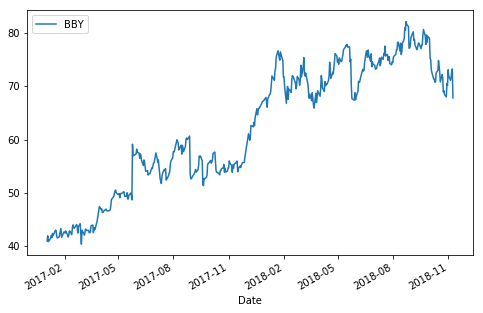

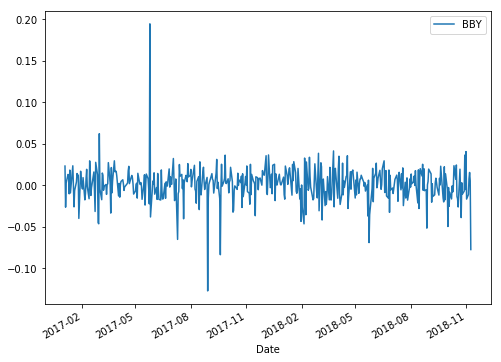

In [14]:
#%%BAJAR PRECIOS DEL STOCK
ticker = ['BBY']
start_date = '2017-01-01'

closes_st = get_historical_closes(ticker, start_date,freq='d')
closes_st.plot(figsize=(8,5));
plt.legend(ticker);
#RENDIMIENTOS
ret_stock = calc_daily_ret(closes_st)
ret_stock.plot(figsize=(8,6));

In [16]:
#%%

#opcion activo 1 amazon a mas de 200 dias
stock_opt.loc[(stock_opt.Type=='call')& (stock_opt.Strike==80)  & (stock_opt.Expiry=='2020-01-17')]
opcion_valuar = stock_opt.loc[333]
opcion_valuar['JSON']

{'contractSymbol': 'BBY200117C00080000',
 'strike': 80.0,
 'currency': 'USD',
 'lastPrice': 8.0,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 1,
 'openInterest': 82,
 'bid': 5.8,
 'ask': 6.8,
 'contractSize': 'REGULAR',
 'expiration': 1579219200,
 'lastTradeDate': 1541620720,
 'impliedVolatility': 0.3751283190917969,
 'inTheMoney': False}

Las std usando rendimientos logarítmicos y simples son iguales


(0.021222170462923295, 0.020988470294819588)

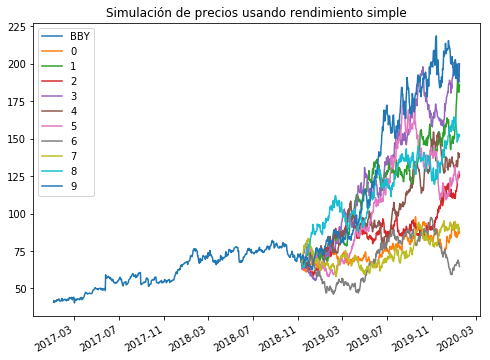

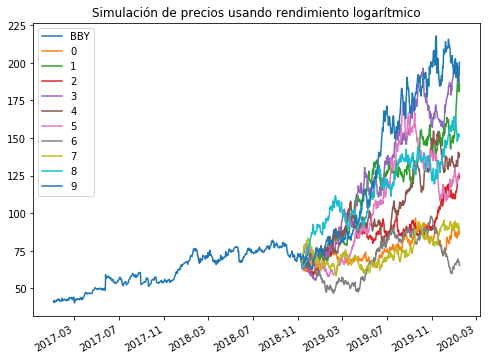

In [22]:
#%% RENDIMIENTOS 

ticker = ['BBY']
start_date = '2017-01-01'
closes_st = get_historical_closes(ticker, start_date,freq='d')
closes_st
# Obtenemos el rendimiento simple
Ri = closes_st.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri
ndays = 432#dias a transcurrir de hoy al 2020-01-17
nscen = 10
dates = pd.date_range('2018-11-11', periods = ndays)
dates
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()
# Simulación del precio
S_0 = closes_st.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_st,S_T]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');
#rendimiento logaritmico
ri = calc_daily_ret(closes_st)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)
# sim_ret_ri
# Simulación del precio
S_0 = closes_st.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_st,S_T2]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento logarítmico');
S_T-S_T2
print('Las std usando rendimientos logarítmicos y simples son iguales')
sigma_R,sigma_r

(11.427491096520852, 12.000999836282753)
(11.427491096520852, 12.000999836282753)
precio de la prima modelo normal para rendimientos :  Prima    11.714
Name: 2020-01-16 00:00:00, dtype: float64


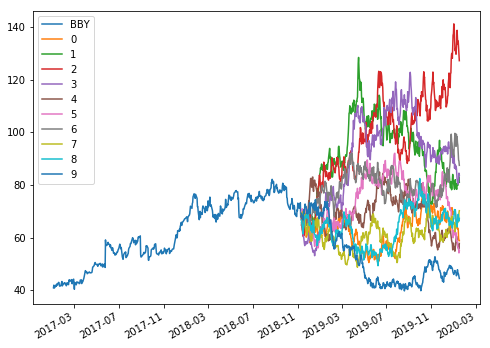

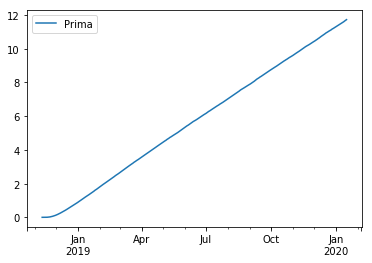

In [18]:
#%%valuacion usando modelo normal para rendimientos
mu = ret_stock.mean()[0]
sigma = ret_stock.std()[0]
mu, sigma
r = 0.0260/360 # Tasa diaria
nscen = 10
dates = pd.date_range('2018-11-11', periods = ndays)
dates
#GENERAR 10 ESCENARIOS
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato
S0 = closes_st.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes
#sim_closes.plot(figsize=(8,6));
pd.concat([closes_st,sim_closes]).plot(figsize=(8,6));

K=80 # strike price
ndays = 432
nscen = 100000
dates = pd.date_range('2018-11-11', periods = ndays)
S0 = closes_st.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
putmnr = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(sim_closes-strike,np.zeros([ndays,nscen])).T.mean()}, index=dates)
putmnr.plot();
#aqui es donde se le mete la ecacion BS put= -st+k
putmnr.iloc[-1]
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = putmnr.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)
print('precio de la prima modelo normal para rendimientos : ',putmnr.iloc[-1])

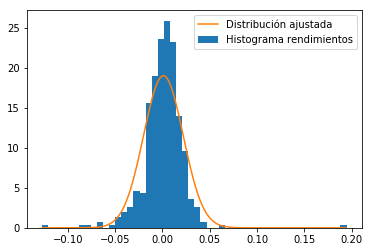

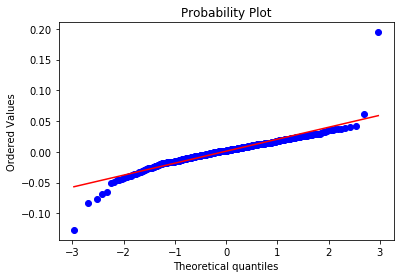

In [19]:
#%% ANALISIS DE RENDIMIENTOS
ren = calc_daily_ret(closes_st) # rendimientos 
y,x,des = plt.hist(ren['BBY'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()
st.probplot(ren['BBY'], dist='norm', plot=plt);

(12.667947642913607, 14.138079574705703)
(12.667947642913607, 14.138079574705703)
precio de la prima usando histograma de rendimientos:  Prima    13.403
Name: 2020-01-16 00:00:00, dtype: float64


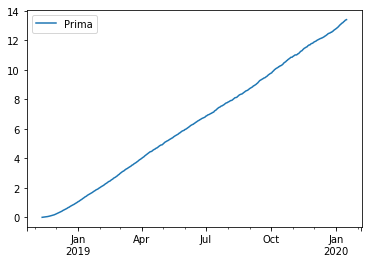

In [20]:
#%%Valuación usando simulación: uso del histograma de rendimientos
prob = y/np.sum(y)
values = x[1:]
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range('2018-11-11',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist
sim_closes_hist = (closes_st.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist
K=80
ndays = 432
nscen = 10000
freq, values = np.histogram(ret_stock+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-11-11',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_st.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                          *np.fmax(sim_closes_hist-strike,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();
#aqui es donde se le mete la ecacion BS put= -st+k
put_hist.iloc[-1]
#INTERVALO DE CONFIANZA
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)
print('precio de la prima usando histograma de rendimientos: ',put_hist.iloc[-1])

In [21]:
#%%valuacion vs primas valuadas en yahoo finance
print('precio de la prima modelo normal para rendimientos : ',putmnr.iloc[-1])
print('precio de la prima usando histograma de rendimientos: ',put_hist.iloc[-1])
stock_opt.loc[(stock_opt.Type=='call')& (stock_opt.Strike==80)  & (stock_opt.Expiry=='2020-01-17')]
opcion_valuar = stock_opt.loc[333]
opcion_valuar['JSON']

precio de la prima modelo normal para rendimientos :  Prima    11.714
Name: 2020-01-16 00:00:00, dtype: float64
precio de la prima usando histograma de rendimientos:  Prima    13.403
Name: 2020-01-16 00:00:00, dtype: float64


{'contractSymbol': 'BBY200117C00080000',
 'strike': 80.0,
 'currency': 'USD',
 'lastPrice': 8.0,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 1,
 'openInterest': 82,
 'bid': 5.8,
 'ask': 6.8,
 'contractSize': 'REGULAR',
 'expiration': 1579219200,
 'lastTradeDate': 1541620720,
 'impliedVolatility': 0.3751283190917969,
 'inTheMoney': False}

interpretación: la variación de las dos valuaciones es de 14.41%, siendo mayor el precio que se calculo mediante el modelo normal para rendimientos. El precio de la última opción de best buy para el 17 de enero de 2020 es de 8, dando un resultado muy diferente a nuestras valuaciones.

## valuacion de opciones call menores a 100 dias

### valuacion de opcion put amazon

In [23]:
stock = web.YahooOptions('AMZN')
stock_opt = stock.get_all_data().reset_index()
#pd.set_option('display.expand_frame_repr', False,'display.max_columns',False,'display.max_rows',False)
stock_opt.set_index('Expiry')
# closes = web.YahooDailyReader(ticker, start_date, end_date).read().sort_index('major_axis')

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2019-01-18,365.0,call,AMZN190118C00365000,...,2018-11-09 21:00:01,2018-11-09 16:16:41,"{'contractSymbol': 'AMZN190118C00365000', 'str..."
2019-01-18,365.0,put,AMZN190118P00365000,...,2018-11-09 21:00:01,2018-11-09 18:27:46,"{'contractSymbol': 'AMZN190118P00365000', 'str..."
2019-01-18,370.0,call,AMZN190118C00370000,...,2018-11-09 21:00:01,2018-11-01 17:16:20,"{'contractSymbol': 'AMZN190118C00370000', 'str..."
2019-01-18,370.0,put,AMZN190118P00370000,...,2018-11-09 21:00:01,2018-11-09 17:30:05,"{'contractSymbol': 'AMZN190118P00370000', 'str..."
2019-01-18,375.0,call,AMZN190118C00375000,...,2018-11-09 21:00:01,2018-11-09 16:09:36,"{'contractSymbol': 'AMZN190118C00375000', 'str..."
...,...,...,...,...,...,...,...
2019-06-21,3000.0,put,AMZN190621P03000000,...,2018-11-09 21:00:01,2018-10-02 13:44:59,"{'contractSymbol': 'AMZN190621P03000000', 'str..."
2020-01-17,3000.0,call,AMZN200117C03000000,...,2018-11-09 21:00:01,2018-11-09 20:56:51,"{'contractSymbol': 'AMZN200117C03000000', 'str..."
2020-01-17,3000.0,put,AMZN200117P03000000,...,2018-11-09 21:00:01,2018-11-08 15:28:51,"{'contractSymbol': 'AMZN200117P03000000', 'str..."


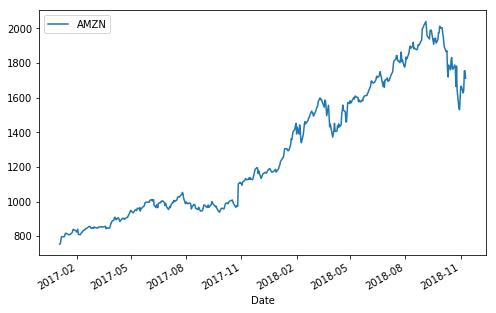

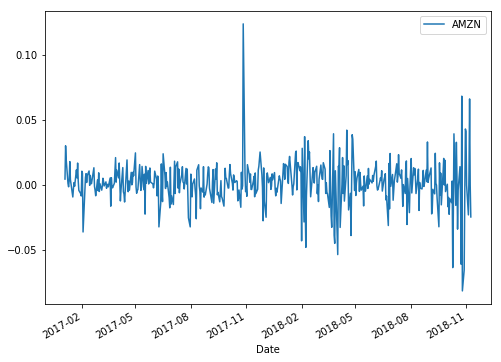

In [24]:
#%%BAJAR PRECIOS DEL STOCK
ticker = ['AMZN']
start_date = '2017-01-01'

closes_st = get_historical_closes(ticker, start_date,freq='d')
closes_st.plot(figsize=(8,5));
plt.legend(ticker);
#RENDIMIENTOS
ret_stock = calc_daily_ret(closes_st)
ret_stock.plot(figsize=(8,6));

In [25]:
#opcion activo 1 amazon a mas de 200 dias
stock_opt.loc[(stock_opt.Type=='call')& (stock_opt.Strike==2200)  & (stock_opt.Expiry=='2019-01-18')]
opcion_valuar = stock_opt.loc[2731]
opcion_valuar['JSON']

{'contractSymbol': 'AMZN190118C02200000',
 'strike': 2200.0,
 'currency': 'USD',
 'lastPrice': 5.25,
 'change': -0.25,
 'percentChange': -4.5454545,
 'volume': 13,
 'openInterest': 1771,
 'bid': 4.6,
 'ask': 5.25,
 'contractSize': 'REGULAR',
 'expiration': 1547769600,
 'lastTradeDate': 1541796224,
 'impliedVolatility': 0.34180345703125,
 'inTheMoney': False}

Las std usando rendimientos logarítmicos y simples son iguales


(0.016875133251193705, 0.016794935544138127)

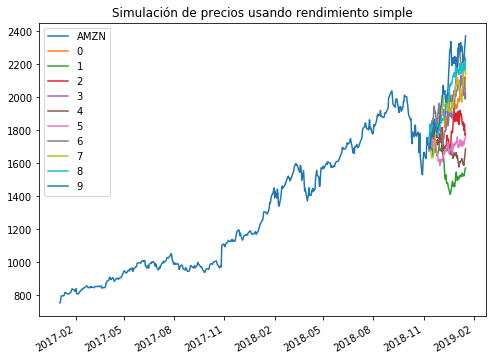

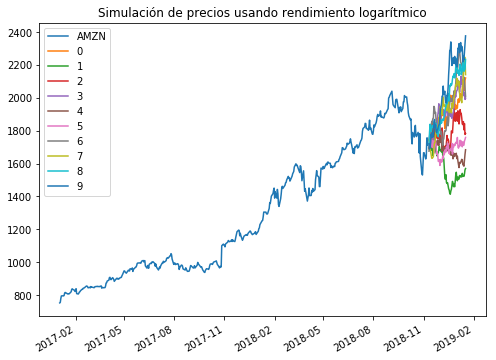

In [26]:
#%% RENDIMIENTOS 

ticker = ['AMZN']
start_date = '2017-01-01'
closes_st = get_historical_closes(ticker, start_date,freq='d')
closes_st
# Obtenemos el rendimiento simple
Ri = closes_st.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri
ndays = 68#dias a transcurrir de hoy al 2020-01-17
nscen = 10
dates = pd.date_range('2018-11-11', periods = ndays)
dates
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()
# Simulación del precio
S_0 = closes_st.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_st,S_T]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');
#rendimiento logaritmico
ri = calc_daily_ret(closes_st)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)
# sim_ret_ri
# Simulación del precio
S_0 = closes_st.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_st,S_T2]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento logarítmico');
S_T-S_T2
print('Las std usando rendimientos logarítmicos y simples son iguales')
sigma_R,sigma_r

(2.981146324812604, 6.914258794479313)
(2.981146324812604, 6.914258794479313)
precio de la prima modelo normal para rendimientos :  Prima    4.948
Name: 2019-01-17 00:00:00, dtype: float64


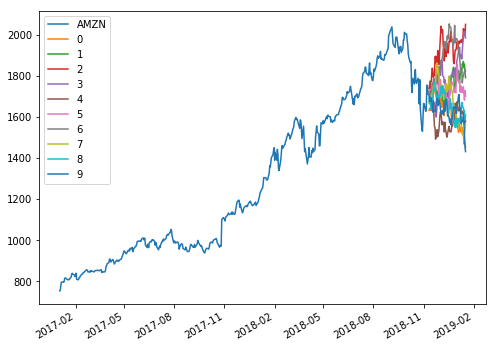

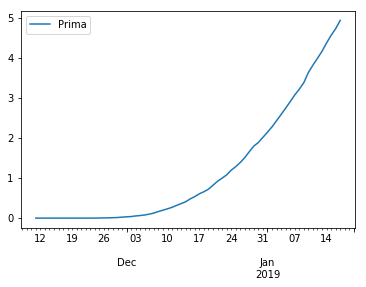

In [27]:
#%%valuacion usando modelo normal para rendimientos
mu = ret_stock.mean()[0]
sigma = ret_stock.std()[0]
mu, sigma
r = 0.0260/360 # Tasa diaria
nscen = 10
dates = pd.date_range('2018-11-11', periods = ndays)
dates
#GENERAR 10 ESCENARIOS
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato
S0 = closes_st.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes
#sim_closes.plot(figsize=(8,6));
pd.concat([closes_st,sim_closes]).plot(figsize=(8,6));

K=2200 # strike price
ndays = 68
nscen = 100000
dates = pd.date_range('2018-11-11', periods = ndays)
S0 = closes_st.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
putmnr = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(sim_closes-strike,np.zeros([ndays,nscen])).T.mean()}, index=dates)
putmnr.plot();
#aqui es donde se le mete la ecacion BS put= -st+k
putmnr.iloc[-1]
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = putmnr.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)
print('precio de la prima modelo normal para rendimientos : ',putmnr.iloc[-1])

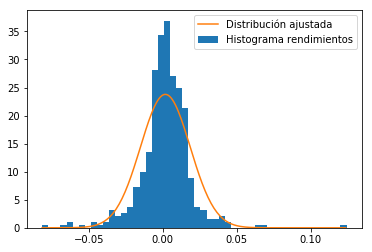

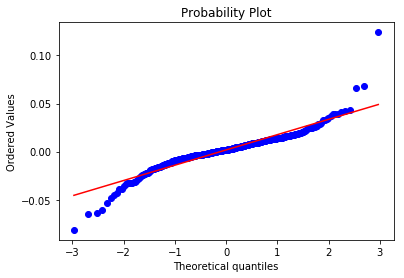

In [28]:
#%% ANALISIS DE RENDIMIENTOS
ren = calc_daily_ret(closes_st) # rendimientos 
y,x,des = plt.hist(ren['AMZN'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()
st.probplot(ren['AMZN'], dist='norm', plot=plt);

(-1.0213866216725842, 11.476408639638564)
(-1.0213866216725842, 11.476408639638564)
precio de la prima usando histograma de rendimientos:  Prima    5.228
Name: 2019-01-17 00:00:00, dtype: float64


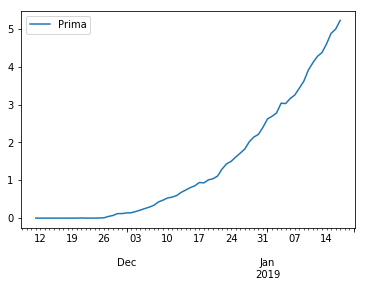

In [29]:
#%%Valuación usando simulación: uso del histograma de rendimientos
prob = y/np.sum(y)
values = x[1:]
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range('2018-11-11',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist
sim_closes_hist = (closes_st.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist
K=2200
ndays = 68
nscen = 10000
freq, values = np.histogram(ret_stock+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-11-11',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_st.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                          *np.fmax(sim_closes_hist-strike,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();
#aqui es donde se le mete la ecacion BS put= -st+k
put_hist.iloc[-1]
#INTERVALO DE CONFIANZA
confianza = 0.99
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)
print('precio de la prima usando histograma de rendimientos: ',put_hist.iloc[-1])

In [30]:
#%%valuacion vs primas valuadas en yahoo finance
print('precio de la prima modelo normal para rendimientos : ',putmnr.iloc[-1])
print('precio de la prima usando histograma de rendimientos: ',put_hist.iloc[-1])
stock_opt.loc[(stock_opt.Type=='call')& (stock_opt.Strike==2200)  & (stock_opt.Expiry=='2019-01-18')]
opcion_valuar = stock_opt.loc[2731]
opcion_valuar['JSON']

precio de la prima modelo normal para rendimientos :  Prima    4.948
Name: 2019-01-17 00:00:00, dtype: float64
precio de la prima usando histograma de rendimientos:  Prima    5.228
Name: 2019-01-17 00:00:00, dtype: float64


{'contractSymbol': 'AMZN190118C02200000',
 'strike': 2200.0,
 'currency': 'USD',
 'lastPrice': 5.25,
 'change': -0.25,
 'percentChange': -4.5454545,
 'volume': 13,
 'openInterest': 1771,
 'bid': 4.6,
 'ask': 5.25,
 'contractSize': 'REGULAR',
 'expiration': 1547769600,
 'lastTradeDate': 1541796224,
 'impliedVolatility': 0.34180345703125,
 'inTheMoney': False}

# análisis Amazon

La variación de precio de las opciones bajo, de los 432 dias a 68 dias la variación del precio de la prima del modelo para rendimientos e histograma de rednimientos bajo de 27% de variación a 5.65%. La prima de la última opción de venta valuada para esa fecha es de 5.25 USD, siendo mayor a las 2 primas calculadas.

## valuación de opciones de compra de best buy para un rango menor a 100 dias

In [31]:
#%% BAJAR PRECIOS DE OPCIONES
stock = web.YahooOptions('BBY')
stock_opt = stock.get_all_data().reset_index()
#pd.set_option('display.expand_frame_repr', False,'display.max_columns',False,'display.max_rows',False)
stock_opt.set_index('Expiry')
# closes = web.YahooDailyReader(ticker, start_date, end_date).read().sort_index('major_axis')

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2019-01-18,20.0,call,BBY190118C00020000,...,2018-11-09 21:00:18,2018-09-22 03:47:15,"{'contractSymbol': 'BBY190118C00020000', 'stri..."
2019-01-18,20.0,put,BBY190118P00020000,...,2018-11-09 21:00:18,2018-08-17 19:13:49,"{'contractSymbol': 'BBY190118P00020000', 'stri..."
2019-01-18,23.0,put,BBY190118P00023000,...,2018-11-09 21:00:18,2018-11-01 20:29:27,"{'contractSymbol': 'BBY190118P00023000', 'stri..."
2019-01-18,25.0,call,BBY190118C00025000,...,2018-11-09 21:00:18,2018-09-22 03:47:15,"{'contractSymbol': 'BBY190118C00025000', 'stri..."
2019-01-18,25.0,put,BBY190118P00025000,...,2018-11-09 21:00:18,2018-10-25 13:30:20,"{'contractSymbol': 'BBY190118P00025000', 'stri..."
...,...,...,...,...,...,...,...
2019-03-15,115.0,call,BBY190315C00115000,...,2018-11-09 21:00:18,2018-11-08 16:10:50,"{'contractSymbol': 'BBY190315C00115000', 'stri..."
2020-01-17,115.0,call,BBY200117C00115000,...,2018-11-09 21:00:18,2018-10-08 15:33:48,"{'contractSymbol': 'BBY200117C00115000', 'stri..."
2019-03-15,120.0,call,BBY190315C00120000,...,2018-11-09 21:00:18,2018-11-05 15:05:39,"{'contractSymbol': 'BBY190315C00120000', 'stri..."


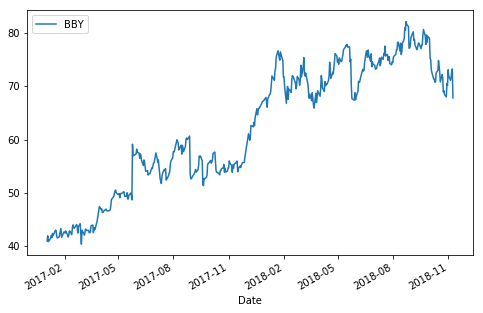

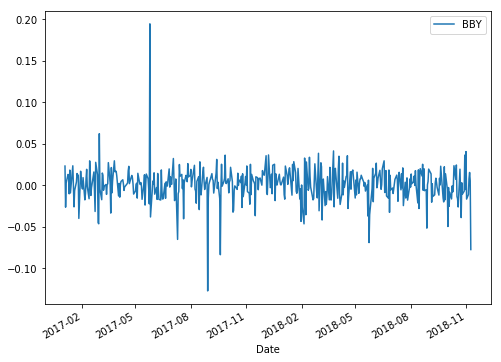

In [32]:
#%%BAJAR PRECIOS DEL STOCK
ticker = ['BBY']
start_date = '2017-01-01'

closes_st = get_historical_closes(ticker, start_date,freq='d')
closes_st.plot(figsize=(8,5));
plt.legend(ticker);
#RENDIMIENTOS
ret_stock = calc_daily_ret(closes_st)
ret_stock.plot(figsize=(8,6));

In [33]:
stock_opt.loc[(stock_opt.Type=='call')& (stock_opt.Strike==75)  & (stock_opt.Expiry=='2019-01-18')]
opcion_valuar = stock_opt.loc[273]
opcion_valuar['JSON']

{'contractSymbol': 'BBY190118C00075000',
 'strike': 75.0,
 'currency': 'USD',
 'lastPrice': 2.66,
 'change': -1.29,
 'percentChange': -32.658226,
 'volume': 336,
 'openInterest': 1582,
 'bid': 2.39,
 'ask': 2.59,
 'contractSize': 'REGULAR',
 'expiration': 1547769600,
 'lastTradeDate': 1541794980,
 'impliedVolatility': 0.4445856323242187,
 'inTheMoney': False}

Las std usando rendimientos logarítmicos y simples son iguales


(0.021222170462923295, 0.020988470294819588)

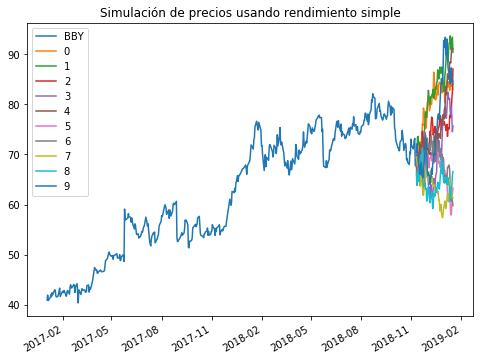

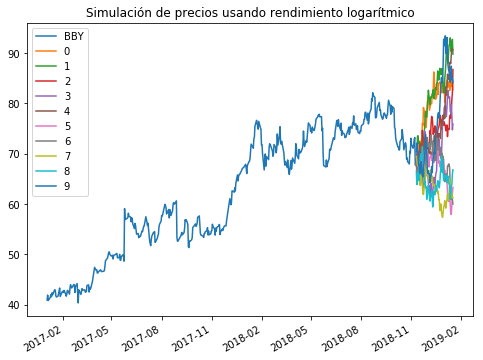

In [34]:
#%% RENDIMIENTOS 

ticker = ['BBY']
start_date = '2017-01-01'
closes_st = get_historical_closes(ticker, start_date,freq='d')
closes_st
# Obtenemos el rendimiento simple
Ri = closes_st.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri
ndays = 68#dias a transcurrir de hoy al 2020-01-17
nscen = 10
dates = pd.date_range('2018-11-11', periods = ndays)
dates
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()
# Simulación del precio
S_0 = closes_st.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_st,S_T]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');
#rendimiento logaritmico
ri = calc_daily_ret(closes_st)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)
# sim_ret_ri
# Simulación del precio
S_0 = closes_st.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_st,S_T2]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento logarítmico');
S_T-S_T2
print('Las std usando rendimientos logarítmicos y simples son iguales')
sigma_R,sigma_r

(2.468165096997287, 2.6644947554219125)
(2.468165096997287, 2.6644947554219125)
precio de la prima modelo normal para rendimientos :  Prima    2.566
Name: 2019-01-17 00:00:00, dtype: float64


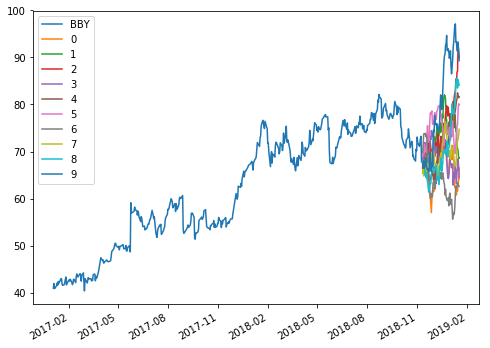

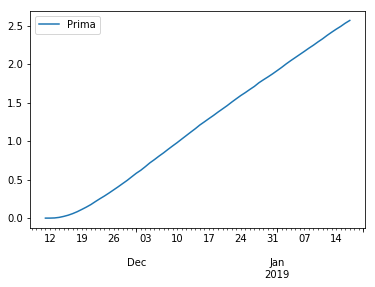

In [35]:
#%%valuacion usando modelo normal para rendimientos
mu = ret_stock.mean()[0]
sigma = ret_stock.std()[0]
mu, sigma
r = 0.0260/360 # Tasa diaria
nscen = 10
dates = pd.date_range('2018-11-11', periods = ndays)
dates
#GENERAR 10 ESCENARIOS
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato
S0 = closes_st.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes
#sim_closes.plot(figsize=(8,6));
pd.concat([closes_st,sim_closes]).plot(figsize=(8,6));

K=75 # strike price
ndays = 68
nscen = 100000
dates = pd.date_range('2018-11-11', periods = ndays)
S0 = closes_st.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
putmnr = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(sim_closes-strike,np.zeros([ndays,nscen])).T.mean()}, index=dates)
putmnr.plot();
#aqui es donde se le mete la ecacion BS put= -st+k
putmnr.iloc[-1]
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = putmnr.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)
print('precio de la prima modelo normal para rendimientos : ',putmnr.iloc[-1])

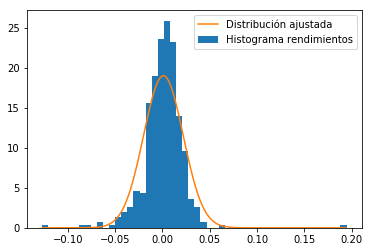

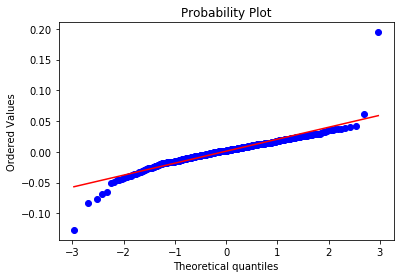

In [36]:
#%% ANALISIS DE RENDIMIENTOS
ren = calc_daily_ret(closes_st) # rendimientos 
y,x,des = plt.hist(ren['BBY'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()
st.probplot(ren['BBY'], dist='norm', plot=plt);

(2.4942026341706924, 2.9763746712738186)
(2.4942026341706924, 2.9763746712738186)
precio de la prima usando histograma de rendimientos:  Prima    2.735
Name: 2019-01-17 00:00:00, dtype: float64


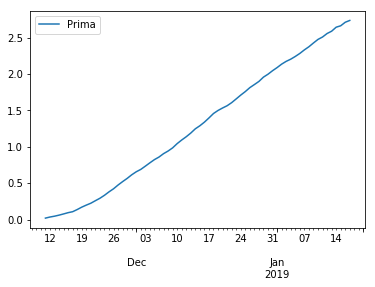

In [37]:
#%%Valuación usando simulación: uso del histograma de rendimientos
prob = y/np.sum(y)
values = x[1:]
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range('2018-11-11',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist
sim_closes_hist = (closes_st.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist
K=75
ndays = 68
nscen = 10000
freq, values = np.histogram(ret_stock+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-11-11',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_st.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                          *np.fmax(sim_closes_hist-strike,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();
#aqui es donde se le mete la ecacion BS put= -st+k
put_hist.iloc[-1]
#INTERVALO DE CONFIANZA
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)
print('precio de la prima usando histograma de rendimientos: ',put_hist.iloc[-1])

In [38]:
#%%valuacion vs primas valuadas en yahoo finance
print('precio de la prima modelo normal para rendimientos : ',putmnr.iloc[-1])
print('precio de la prima usando histograma de rendimientos: ',put_hist.iloc[-1])
stock_opt.loc[(stock_opt.Type=='call')& (stock_opt.Strike==75)  & (stock_opt.Expiry=='2019-01-18')]
opcion_valuar = stock_opt.loc[273]
opcion_valuar['JSON']

precio de la prima modelo normal para rendimientos :  Prima    2.566
Name: 2019-01-17 00:00:00, dtype: float64
precio de la prima usando histograma de rendimientos:  Prima    2.735
Name: 2019-01-17 00:00:00, dtype: float64


{'contractSymbol': 'BBY190118C00075000',
 'strike': 75.0,
 'currency': 'USD',
 'lastPrice': 2.66,
 'change': -1.29,
 'percentChange': -32.658226,
 'volume': 336,
 'openInterest': 1582,
 'bid': 2.39,
 'ask': 2.59,
 'contractSize': 'REGULAR',
 'expiration': 1547769600,
 'lastTradeDate': 1541794980,
 'impliedVolatility': 0.4445856323242187,
 'inTheMoney': False}

# Análisis 

La variación del precio de las opciones valuadas mediante los dos métodos redujo su vaiación del 14.41 al 6.5%. El hecho de reducir el tiempo de la opción reduce la diferencia en las dos estimaciones.


## concluciones:

La variación de las opciones se hizo calculando dos métodos, tuvo menor variación cuando se calculo una prima para menor tiempo. La reducción de error al disminuir el tiempo se produce, ya que el calculo de la prima se hace calculando rendimientos, al haber menos cantidad de días, el error a la hora de simular es menor. Los mejores modelos de estimación de precios son para el corto plazo, en los plazos largos, este tipo de modelos fallan más veces.